In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.general.make_noise import beep_on_error, beep_repeat, beep
beep_on_error()

In [3]:
import pandas as pd
import numpy as np
from src.data_tools.filename_skim_tools import regex_select, get_files, make_df
from src.data_tools.bff_meta import preselection, band_cut, isin, identity, all_reg, jet_variations
from src.data_tools.bff_cuts import *
from src.general.bit_utils import isKthBitSet, isKthArrayBitSetAND, isKthArrayBitSetOR

from glob import glob
import re

/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-scipy/1.7.1-c59502069094870046fda47cb5a5065e/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [4]:
def one_in(list_of_strings, test_string):
    for string_in in list_of_strings:
        if string_in in test_string: return True
    return False

In [5]:
from src.data_tools.get_file_list import get_file_df
from src.data_tools.get_data import get_data
from src.data_tools.apply_cuts_v2 import  process_sample
from src.assets.output_dir import output_dir
output_dir

'/eos/cms/store/group/phys_exotica/bffZprime/assets_june_23'

In [71]:
era = 2016
file_df = get_file_df(path = "{}/data".format(output_dir))
file_df = file_df[file_df.era==era]
file_df.reset_index(inplace=True)

In [72]:
file_df

,index,type,category,file,mass,dbs,gmu,gb,era,xsec,sample_name
0,84,bck_ext,ST_extra,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,3.365000e+03,ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-py...
1,85,bck_ext,ST_extra,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,1.133000e+05,ST_t-channel_top_4f_inclusiveDecays_13TeV-powh...
2,86,bck_ext,TB,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,2.086000e+02,WWW_4F_TuneCUETP8M1_13TeV-amcatnlo-pythia8
3,87,bck_ext,TB,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,1.651000e+02,WWZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8
4,88,bck_ext,TB,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,5.565000e+01,WZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8
5,89,bck_ext,TB,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,1.398000e+01,ZZZ_TuneCUETP8M1_13TeV-amcatnlo-pythia8
6,90,bck_ext,WJ,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,5.026000e+07,WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
7,91,bck_ext,WJ,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,9.965000e+04,WJetsToQQ_HT-600ToInf_TuneCUETP8M1_13TeV-madgr...
8,92,bck_ext,WJ,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,3.469000e+04,WJetsToQQ_HT-800toInf_qc19_3j_TuneCUETP8M1_13T...
9,93,bck_ext,TTV,/eos/cms/store/group/phys_exotica/bffZprime/as...,NaN,NaN,NaN,NaN,2016,2.001000e+02,TTWJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-m...


In [101]:
df8 = process_sample(file_df.iloc[1], era, verbose=True, trigger_fix=True)

ST_t-channel_top_4f_inclusiveDecays_13TeV-powhegV2-madspin-pythia8_TuneCUETP8M1
	0.08108108108108109 remaining


In [102]:
df8.filter(regex='CR').columns

Index(['CR10_jet_nom_muon_corrected_pt_ele_pt',
       'CR11_jet_nom_muon_corrected_pt_ele_pt',
       'CR12_jet_nom_muon_corrected_pt_ele_pt',
       'CR13_jet_nom_muon_corrected_pt_ele_pt',
       'CR14_jet_nom_muon_corrected_pt_ele_pt',
       'CR20_jet_nom_muon_corrected_pt_ele_pt',
       'CR21_jet_nom_muon_corrected_pt_ele_pt',
       'CR22_jet_nom_muon_corrected_pt_ele_pt',
       'CR23_jet_nom_muon_corrected_pt_ele_pt',
       'CR24_jet_nom_muon_corrected_pt_ele_pt',
       'CR10_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR11_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR12_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR13_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR14_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR20_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR21_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR22_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR23_jet_jesTotalUp_muon_corrected_pt_ele_pt',
       'CR24_jet_jesTotal

In [103]:
df8[['CRC', 'CR14_jet_nom_muon_correctedDown_pt_ele_pt']]

,CRC,CR14_jet_nom_muon_correctedDown_pt_ele_pt
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


In [17]:
##
## hist making
##

In [18]:
from src.plotting_tools.Bins import Bins, bins, binning_type
from src.plotting_tools.cms_format import cms_format_fig, cms_style
from src.plotting_tools.colors import color_fader
from src.assets.regions import nJets, regions, region_and_label, test_regions
from src.assets.file_groups import bck_dict, bck_list, bck_colors
from src.plotting_tools.draw_stack_plot_hists import draw_bckground, draw_signals, draw_data, draw_stackplot
from src.plotting_tools.latexAssets import HTLT, RelMET
import matplotlib.pyplot as plt

from src.plotting_tools.SysHist import make_sys_hist, SysHist

from src.assets.lumi import lumi_dict
lumi = lumi_dict[str(era)]

In [19]:
regions

['SR1', 'SR2', 'CR10', 'CR20', 'CR13', 'CR23', 'CR14', 'CR24']

In [20]:
hists = {
"DiLepMass": (Bins(np.linspace(105, 900, (900-105)+1)), 1), 
"HTLT": (Bins(np.linspace(-800,800,100)), .01), 
"RelMET": (Bins(np.linspace(0, 2,100)), .01), 
"minGoodJetElDR": (Bins(np.linspace(0,5,100)), .01), 
"minGoodJetMuDR": (Bins(np.linspace(0,5,100)), .01), 
}

In [21]:
draw_inline = True
if draw_inline:
    plt.ion()
else:
    plt.ioff()

In [36]:


def make_hist_dict(row, reg, feature):
    bins, select_level = hists[feature]
    isdata = row.type=='data'
    if reg in regions:
        hist = make_sys_hist(df, feature, reg, bin_edges=bins.bin_edges,
                     ind_sys_hist=False, select_level=select_level, 
                         isdata=isdata)
    else:
        hist = make_sys_hist(df, feature, reg, bin_edges=bins.bin_edges,
                     ind_sys_hist=False, select_level=select_level, 
                         isdata=isdata, nom_string ="")
    
    hist_dict = hist.to_dict()
    
    hist_dict['reg'] = reg
    hist_dict['feature'] = feature
    hist_dict['select_level'] = select_level
    return {**row.to_dict(), **hist_dict}
    

In [23]:
row = file_df[(file_df.mass==200) & (file_df.dbs==0.04) ].iloc[0]
df = process_sample(row, era, verbose=True, trigger_fix=True)

BFFZprimeToMuMu_M_200_dbs0p04
	0.8900031889508352 remaining


In [13]:
xsec = row.xsec
mass = row.mass

In [14]:
prebff = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0]))
postRelMet = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0,1]))
postHTLT = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0,2]))

postbff = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0,1,2]))
postdielectron = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0,1,2,4]))
all_selection = (df.SR1_jet_nom_muon_corrected_pt_ele_pt*31).apply(lambda x: isKthArrayBitSetAND(int(x), [0,1,2,3, 4]))


unwieghted_prebff = prebff.sum()
wieghted_prebff = (prebff*df.Weight).sum()
wieghted_postHTLT = (postHTLT*df.Weight).sum()
wieghted_postRelMet = (postRelMet*df.Weight).sum()
wieghted_postbff = (postbff*df.Weight).sum()
wieghted_postdielectron = (postdielectron*df.Weight).sum()



total = (all_selection*df.Weight).sum()
weight = df.Weight.mean()
unwieghted = (all_selection).sum()
lenght = df.shape[0]
print(f"{mass}, {era}, {xsec},{lenght},{weight}, {wieghted_prebff}, {wieghted_postHTLT}, {wieghted_postRelMet}, {wieghted_postbff}, {wieghted_postdielectron}, {total}")

200.0, 2016, 288.9,90929,0.022094071332582503, 1055.0656645456274, 1039.3535693916274, 1023.8188665582591, 1009.3019965670057, 1009.3019965670057, 972.2687095334471


In [52]:
combined_regions = regions + test_regions
hist_list = []
first_iter = 0
for i, row in file_df.iterrows():
    print("-----")
    if 'y3' in row.file: continue
    #if not "125" in row.file: continue
    #if not "0p04" in row.file: continue
    df = process_sample(row, era, verbose=True, trigger_fix=True)

    for reg in combined_regions:
        for hist in hists:
            hist_list.append(make_hist_dict(row, reg, hist))      
    del df
pd.DataFrame(hist_list).to_pickle('{}/data/combined_{}_flat_hist.pkl'.format(output_dir, era))

-----
ZToEE_M_120_200
	0.6375515818431912 remaining
-----
ZToEE_M_200_400
	0.7515068804731037 remaining
-----
ZToEE_M_400_800
	0.7978416277151499 remaining
-----
ZToEE_M_50_120
	0.5970149253731343 remaining
-----
ZToEE_M_800_1400
	0.7491723962312198 remaining
-----
ZToMuMu_M_120_200
	0.8962675714978187 remaining
-----
ZToMuMu_M_200_400
	0.8656589804889334 remaining
-----
ZToMuMu_M_400_800
	0.7549481168332052 remaining
-----
ZToMuMu_M_50_120
	0.8961038961038961 remaining
-----
ZToMuMu_M_800_1400
	0.5814745326940449 remaining
-----
mc_santitop
	0.2071386462297015 remaining
-----
mc_stop
	0.21022263843156208 remaining
-----
mc_ww
	0.27448609431680776 remaining
-----
mc_wz
	0.6 remaining
-----
mc_zz
	0.6936619718309859 remaining
-----
mc_ttbar
	0.15907324806117215 remaining
-----
BFFZprimeToMuMu_M_200_dbs0p04
	0.8900031889508352 remaining
-----
BFFZprimeToMuMu_M_200_dbs0p5
	0.8928722106295397 remaining
-----
BFFZprimeToMuMu_M_200_dbs1p0
	0.894402437648121 remaining
-----
BFFZprimeToMuMu_M_

In [53]:
hist_list

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-ipython/7.27.0-043c1d545e7ae30b265cb52a21d307ac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/rymuelle/ipykernel_12662/1724519060.py", line 1, in <module>
    hist_list
  File "/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-ipython/7.27.0-043c1d545e7ae30b265cb52a21d307ac/lib/python3.9/site-packages/IPython/core/displayhook.py", line 262, in __call__
    format_dict, md_dict = self.compute_format_data(result)
  File "/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-ipython/7.27.0-043c1d545e7ae30b265cb52a21d307ac/lib/python3.9/site-packages/IPython/core/displayhook.py", line 151, in compute_format_data
    return self.shell.display_formatter.format(result)
  File "/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-ipython/7.27.0-043c1d545e7ae30b265cb52a21d307ac/lib/python3.9/site-packages

TypeError: object of type 'NoneType' has no len()

In [14]:
pd.DataFrame(hist_list).to_pickle('{}/data/combined_{}_flat_hist.pkl'.format(output_dir, era))

In [15]:
beep_repeat()

KeyboardInterrupt: 

In [ ]:
# electron/muon cut loss of statistics

In [ ]:
row = file_df[(file_df.mass==200) & (file_df.dbs==0.04)].iloc[0]
df = process_sample(row, era, verbose=True, trigger_fix=True)

In [ ]:
bits  = df.SR1_jet_nom_muon_corrected_pt_ele_pt.unique()*31

for x in bits:
    print(bin(int(x)),  isKthArrayBitSetAND(int(x), [0,1,2]))



In [ ]:
for mass in [125, 200, 350]:
    row = file_df[(file_df.mass==mass) & (file_df.dbs==0.04)].iloc[0]
    df = process_sample(row, era, verbose=True, trigger_fix=True)
    for reg in ['SR1', 'SR2']:
        nodr_cut  = df.apply( lambda x: isKthArrayBitSetAND(int(x['{}_jet_nom_muon_corrected_pt_ele_pt'.format(reg)]*31), [0,1,2]) , axis=1)
        all_cut  = df.apply( lambda x: isKthArrayBitSetAND(int(x['{}_jet_nom_muon_corrected_pt_ele_pt'.format(reg)]*31), [0,1,2, 3, 4]) , axis=1)
        
        print(reg, mass, nodr_cut.sum()/all_cut.sum()-1)

In [ ]:
test_df = pd.read_pickle('{}/data/combined_{}_flat_hist.pkl'.format(output_dir, era))

/afs/cern.ch/work/r/rymuelle/public/nanoAODzPrime/CMSSW_12_1_0/src/bff_plotting_code_v3/src/plotting_tools/SysHist.py:128: RuntimeWarning: invalid value encountered in double_scalars
  std_sig = sys_diff/abs(sys_diff)
/afs/cern.ch/work/r/rymuelle/public/nanoAODzPrime/CMSSW_12_1_0/src/bff_plotting_code_v3/src/plotting_tools/SysHist.py:21: RuntimeWarning: invalid value encountered in double_scalars
  sys_string+="\n\t{}: {:.2f} to {:.2f}".format(sys, np.sum(down)/nom, np.sum(up)/nom)


nominal: 0.0:
	CR23_jet_jesTotalUp_muon_corrected_pt_ele_pt: nan to nan
	CR23_jet_nom_muon_correctedUp_pt_ele_pt: nan to nan
	CR23_jet_jerUp_muon_corrected_pt_ele_pt: nan to nan
	Weight_PuUp: nan to nan
	Weight_BTagCorrUp: nan to nan
	Weight_BTagUncorrUp: nan to nan
	Weight_PUIDUp: nan to nan
	Weight_PDF_Up: nan to nan
	Weight_ISRFSR_Up: nan to nan
	Weight_MuonSFUp: nan to nan
	Weight_ElectronSFUp: nan to nan
	Weight_L1Up: nan to nan
	Weight_MuonTriggerUp: nan to nan


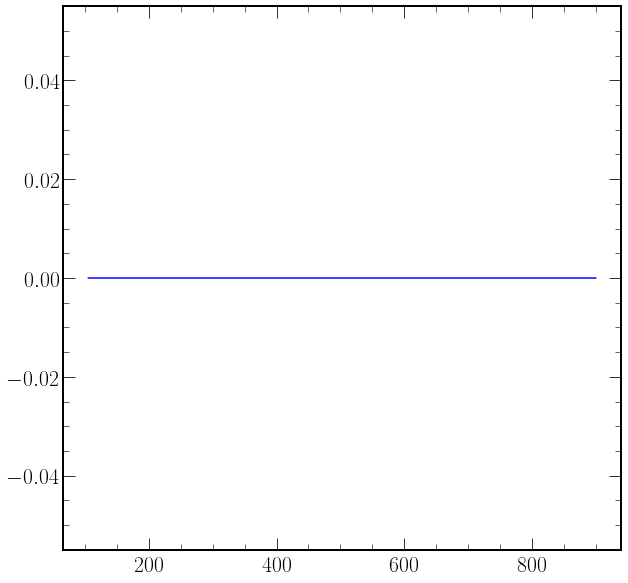

In [32]:
fig, ax = plt.subplots(1)
hist = SysHist.from_dict(test_df.iloc[20].to_dict())
hist.draw(ax)
print(hist.sys_summary())

/afs/cern.ch/work/r/rymuelle/public/nanoAODzPrime/CMSSW_12_1_0/src/bff_plotting_code_v3/src/plotting_tools/SysHist.py:128: RuntimeWarning: invalid value encountered in double_scalars
  std_sig = sys_diff/abs(sys_diff)


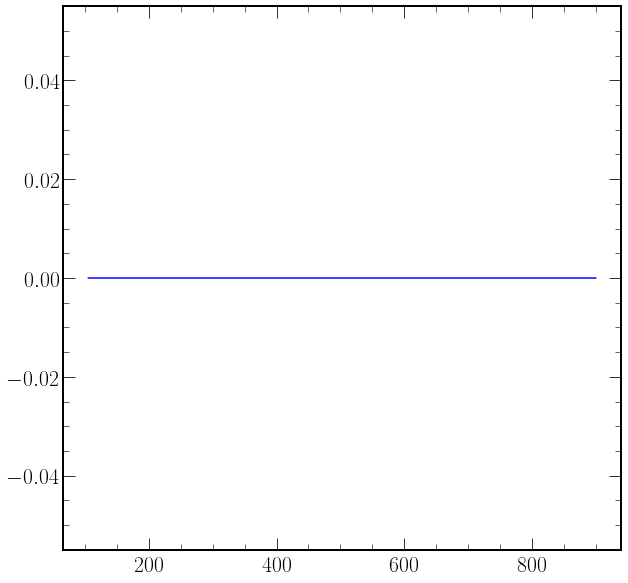

In [33]:
fig, ax = plt.subplots(1)
SysHist.from_dict(hist_list[20]).draw(ax)